In [186]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
url = "https://raw.githubusercontent.com/Bhadiyadra-Sarthak/EECS-3401-final/main/car_web_scraped_dataset.csv"
cars = pd.read_csv(url, sep=',')

#Removing all the data before year 2021
cars = cars[(cars.year >= 2021)]

#backup of the current dataset
cars_backup = cars

In [188]:
cars

,name,year,miles,color,condition,price
0,Kia Forte,2022,"41,406 miles","Gray exterior, Black interior","No accidents reported, 1 Owner","$15,988"
1,Chevrolet Silverado 1500,2021,"15,138 miles","White exterior, Black interior","1 accident reported, 1 Owner","$38,008"
2,Toyota RAV4,2022,"32,879 miles","Silver exterior, Unknown interior","No accidents reported, 1 Owner","$24,988"
13,Mercedes-Benz GLC,2021,"38,760 miles","Black exterior, Black interior","No accidents reported, 1 Owner","$29,998"
15,Honda Civic,2021,"22,850 miles","White exterior, Black interior","No accidents reported, 1 Owner","$21,998"
...,...,...,...,...,...,...
2831,Ford Escape,2022,"26,521 miles","Gray exterior, Black interior","No accidents reported, 1 Owner","$28,468"
2832,Volkswagen Tiguan,2021,"29,540 miles","Black exterior, Gray interior","No accidents reported, 1 Owner","$19,500"
2837,Mercedes-Benz GLC,2022,"27,894 miles","Gray exterior, Gray interior","No accidents reported, 2 Owners","$29,999"
2838,Honda CR-V,2021,"50,220 miles","Gray exterior, Unknown interior","No accidents reported, 1 Owner","$22,992"


In [189]:
cars.head()

,name,year,miles,color,condition,price
0,Kia Forte,2022,"41,406 miles","Gray exterior, Black interior","No accidents reported, 1 Owner","$15,988"
1,Chevrolet Silverado 1500,2021,"15,138 miles","White exterior, Black interior","1 accident reported, 1 Owner","$38,008"
2,Toyota RAV4,2022,"32,879 miles","Silver exterior, Unknown interior","No accidents reported, 1 Owner","$24,988"
13,Mercedes-Benz GLC,2021,"38,760 miles","Black exterior, Black interior","No accidents reported, 1 Owner","$29,998"
15,Honda Civic,2021,"22,850 miles","White exterior, Black interior","No accidents reported, 1 Owner","$21,998"


In [190]:
cars.describe()

,year
count,1164.000000
mean,2021.647766
std,0.802824
min,2021.000000
25%,2021.000000
50%,2021.000000
75%,2022.000000
max,2024.000000


In [191]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1164 entries, 0 to 2839
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       1164 non-null   object
 1   year       1164 non-null   int64 
 2   miles      1164 non-null   object
 3   color      1164 non-null   object
 4   condition  1164 non-null   object
 5   price      1164 non-null   object
dtypes: int64(1), object(5)
memory usage: 63.7+ KB


In [192]:
cars[['Brand', 'Model']] = cars['name'].str.split(' ', n=1, expand=True)
cars = cars.drop(columns=['name'])

In [193]:
# We will change the object type to int64 for our numerical data such as miles and prices
cars['miles'] = cars['miles'].str.strip('miles').str.replace(',','')
cars['miles'] = cars['miles'].astype('int64')

In [194]:
cars["miles"]

0       41406
1       15138
2       32879
13      38760
15      22850
        ...  
2831    26521
2832    29540
2837    27894
2838    50220
2839    26510
Name: miles, Length: 1164, dtype: int64

In [195]:
cars['price'] = cars['price'].str.replace('$', '').str.replace(',','').str.strip()
cars['price'] = cars['price'].astype('int64')

In [196]:
# Clearing color column
cars['exterior'] = cars['color'].str.extract(r'(\D+),')[0].astype(object)
cars['interior'] = cars['color'].str.extract(r',(\D+)')[0].astype(object)
cars['exterior'] = cars['exterior'].str.strip('exterior').str.replace(' ','')
cars['interior'] = cars['interior'].str.strip('interior').str.replace(' ','')
cars = cars.drop(columns=['color'])

In [197]:
# Clearnig Condition column
cars['accidents'] = cars['condition'].str.extract(r'(\d+)\s*accident').replace(np.nan,0).astype(int)
cars['previous_owners'] = cars['condition'].str.extract(r'reported,\s*(\d+)').astype(int)
cars = cars.drop(columns=['condition'])

In [198]:
# Finished dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1164 entries, 0 to 2839
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             1164 non-null   int64 
 1   miles            1164 non-null   int64 
 2   price            1164 non-null   int64 
 3   Brand            1164 non-null   object
 4   Model            1164 non-null   object
 5   exterior         1164 non-null   object
 6   interior         1164 non-null   object
 7   accidents        1164 non-null   int32 
 8   previous_owners  1164 non-null   int32 
dtypes: int32(2), int64(3), object(4)
memory usage: 81.8+ KB


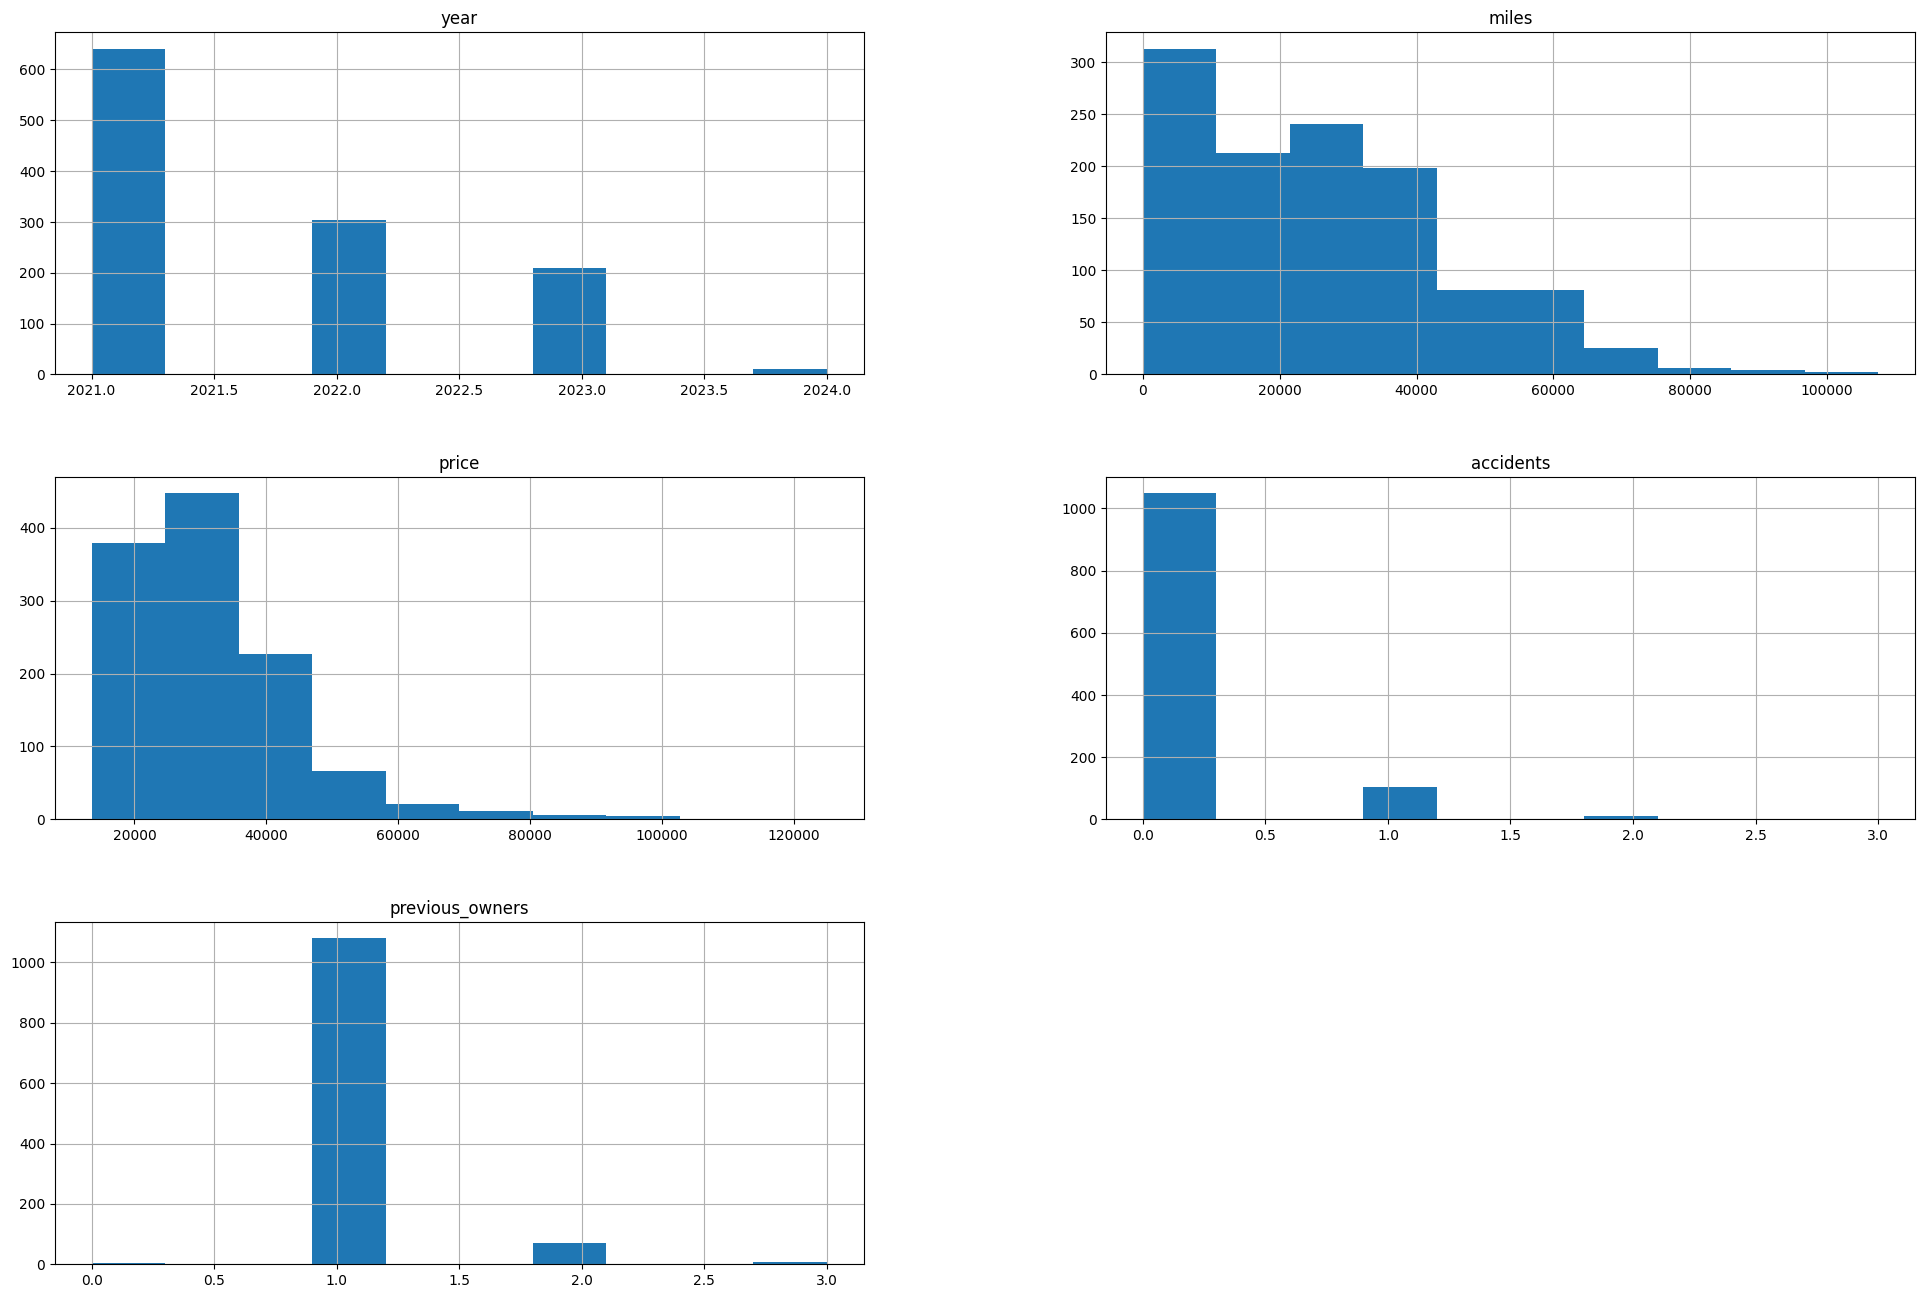

In [199]:
cars.hist(bins= 10,figsize=(24, 16))
plt.show()

In [200]:
# This histogram provides us with better understanding of our dataset.
# Miles and the year of the car affect the car prices and to see how it affects our dataset we will be ploting a lineplot of price vs year and price vs miles

In [201]:
corr_matrix = cars.corr(numeric_only=True)
corr_matrix

,year,miles,price,accidents,previous_owners
year,1.000000,-0.549166,0.310437,-0.169883,-0.101316
miles,-0.549166,1.000000,-0.385931,0.160485,0.081988
price,0.310437,-0.385931,1.000000,-0.100261,0.015721
accidents,-0.169883,0.160485,-0.100261,1.000000,0.052068
previous_owners,-0.101316,0.081988,0.015721,0.052068,1.000000


<Axes: >

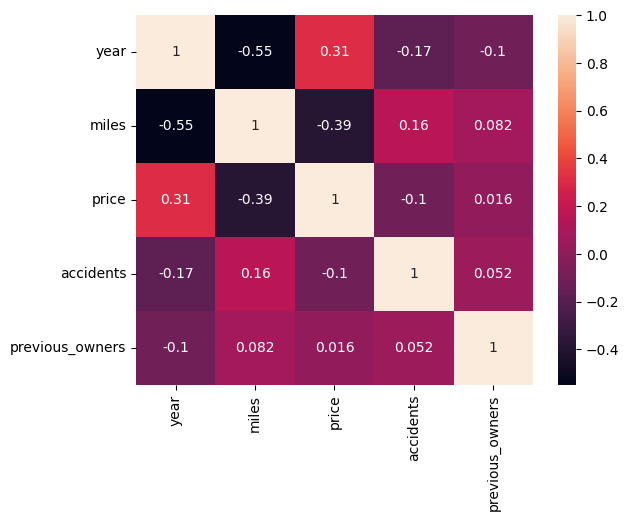

In [202]:
sns.heatmap(corr_matrix, annot=True)

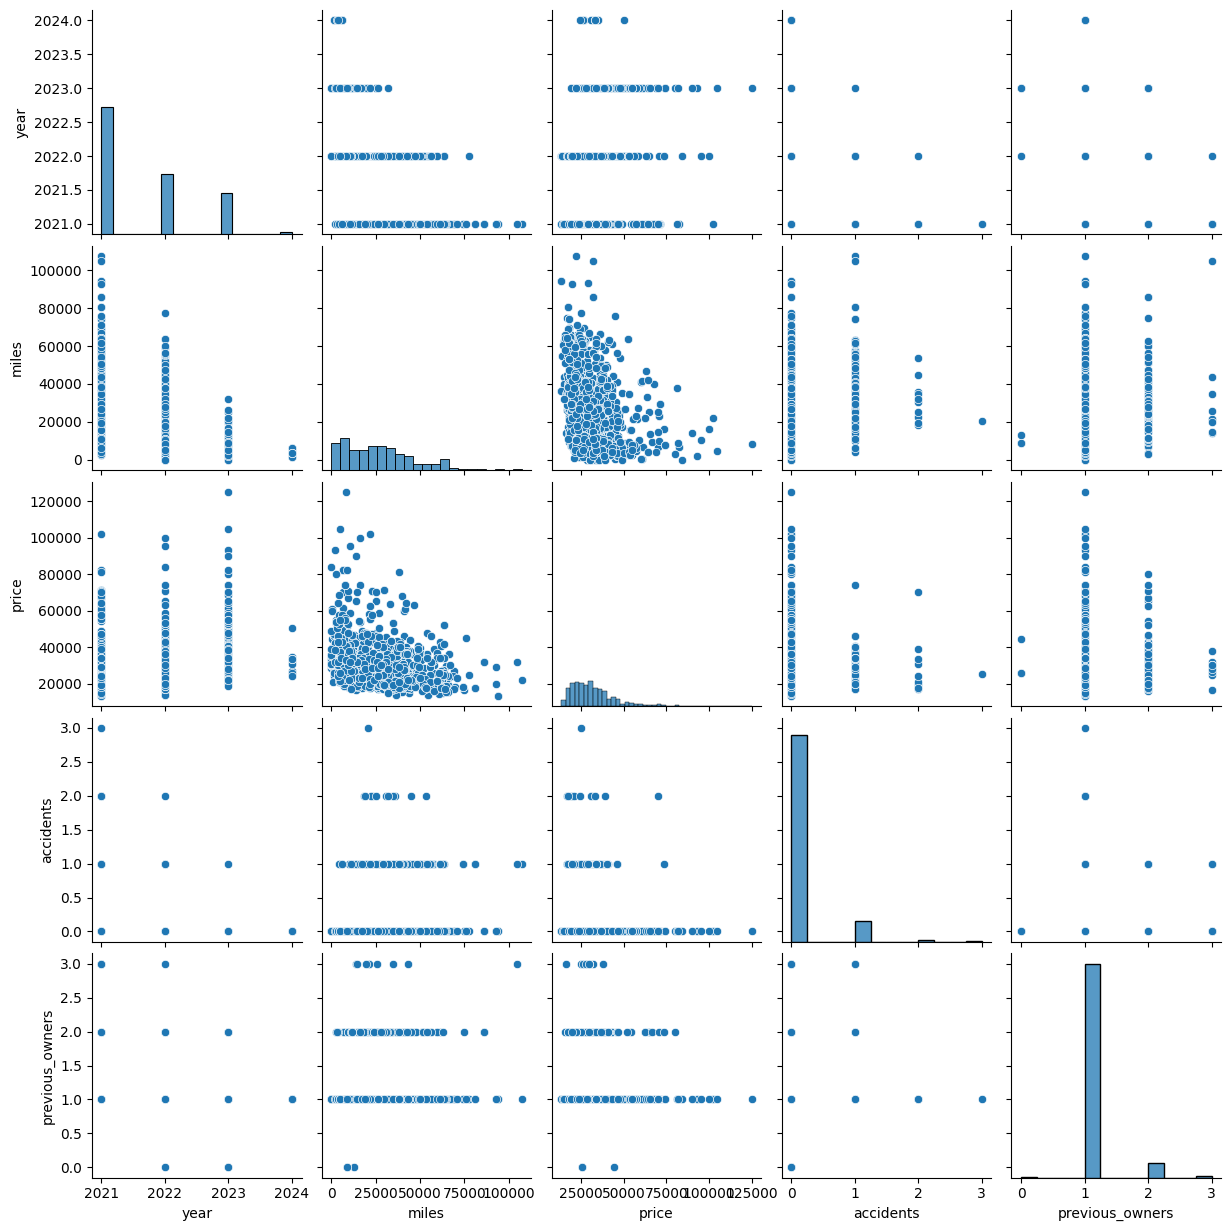

In [203]:
sns.pairplot(cars)
plt.show()

<Axes: xlabel='year', ylabel='price'>

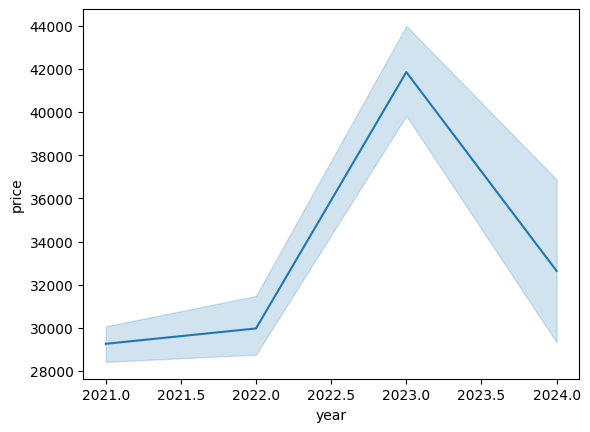

In [204]:
# Year vs price plot
sns.lineplot(x="year", y="price",data=cars)

<Axes: xlabel='miles', ylabel='price'>

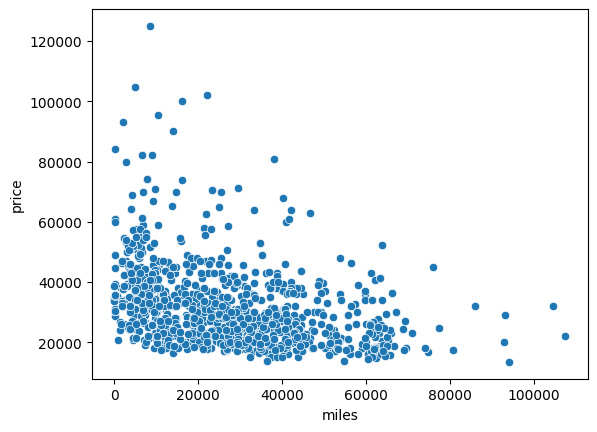

In [205]:
sns.scatterplot(x = 'miles', y = 'price', data=cars)

In [206]:
# Now to find the most expensive Brands for Cars
Most_expensive_cars=cars.sort_values(by='price',ascending=False).head(10)
Most_expensive_cars

,year,miles,price,Brand,Model,exterior,interior,accidents,previous_owners
596,2023,8483,124995,Audi,RS 6 Avant,Gray,Black,0,1
815,2023,4813,104784,Mercedes-Benz,S-Class,Black,Black,0,1
20,2021,21991,102167,Porsche,Cayenne,Silver,Black,0,1
1308,2022,16010,99995,Cadillac,Escalade,White,Black,0,1
2702,2022,10504,95295,Mercedes-Benz,GLE,Silver,Black,0,1
790,2023,2088,93000,Chevrolet,Corvette,Silver,Black,0,1
879,2023,13889,89991,Cadillac,Escalade,Gray,Black,0,1
2080,2022,43,83993,Mercedes-Benz,Sprinter Passenger Van,Black,Black,0,1
838,2021,6537,82150,Chevrolet,Corvette,Yellow,Black,0,1
1040,2021,6537,82150,Chevrolet,Corvette,Yellow,Black,0,1


<Axes: xlabel='Brand', ylabel='price'>

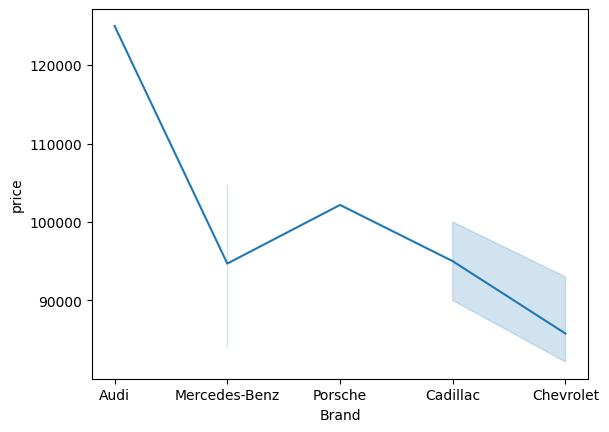

In [207]:
sns.lineplot(x="Brand", y="price", data=Most_expensive_cars)

In [208]:
# Finding duplicates and droping them

cars.duplicated().sum()
cars.drop_duplicates(inplace=True)

In [209]:
cars.replace('Unknown', np.nan, inplace=True)
cars.isnull().sum()

year                0
miles               0
price               0
Brand               0
Model               0
exterior            7
interior           37
accidents           0
previous_owners     0
dtype: int64

In [230]:
# To handle these null values we will be using KNN Imputer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

num_cols = cars.select_dtypes(include='number').columns.to_list()
cat_cols = cars.columns[cars.dtypes == 'object'].tolist()

num_cols.remove('price')


num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(),KNNImputer(n_neighbors=1))

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols),],
                                    remainder='passthrough'
                                 )


In [231]:
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['year', 'miles', 'accidents',
                                  'previous_owners']),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder()),
                                                 ('knnimputer',
                                                  KNNImputer(n_neighbors=10))]),
                                 ['Brand', 'Model', 'exterior', 'interior'])])

In [236]:
# Apply the preprocessing pipeline on the dataset
cars_prep = preprocessing.fit_transform(cars)

cars_prep





TypeError: Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.